In [9]:
import importlib
from pymate import *
import plotly.express as px
import matplotlib.pyplot as plt
pymate = importlib.reload(pymate)

In [13]:
seasonality = 0.0
number_generations = 1000
number_females = 10
number_males = 10
model = population()
model.evolve()

1
18
22
34
48
55
56
78
80
81
104
125
126
128
131
133
135
136
145
149
151
163
167
187
200
201
207
211
224
229
231
242
258
259
266
267
273
278
282
301
305
307
354
355
362
365
369
383
407
420
426
430
434
454
463
473
499
510
511
514
523
528
537
540
550
567
582
595
596
598
601
602
648
654
676
681
683
686
716
723
734
740
772
805
819
821
829
851
852
865
881
882
886
897
902
904
924
941
945
946
958
968
975
978
990
992
[0.005971732449246531, 0.0031087525454285454, 0.005971732449246531, 0.005971732449246531, 0.004294664138899586, 0.004294664138899586, 0.005971732449246531, 0.004294664138899586, 0.004294664138899586, 0.004294664138899586]


In [38]:
model.groups[0].males[0].competitive_effort = 1.2
model.groups[0].set_ranks()
[m.quality**m.competitive_effort for m in model.groups[0].males]


[1.4874198655623336, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

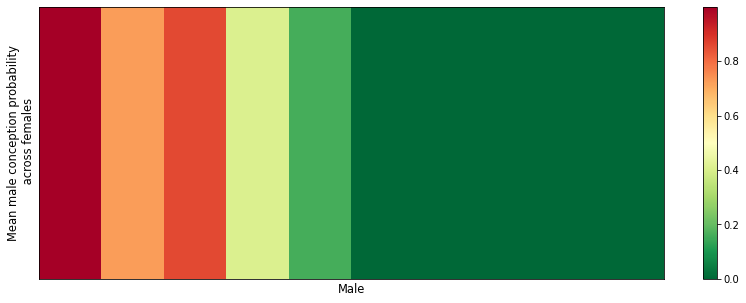

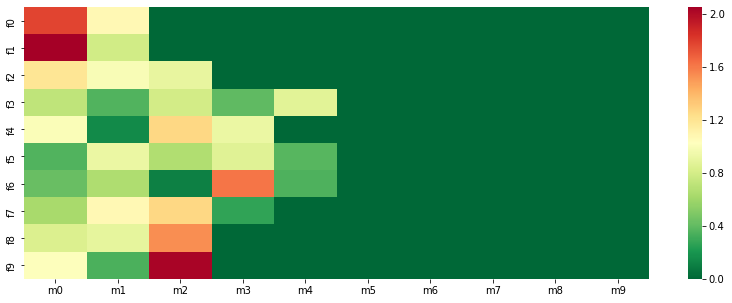

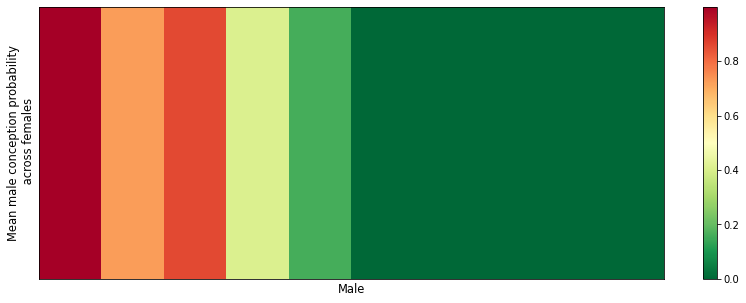

In [39]:
#[model.groups[0].go_one_day() for i in range(40)]
model.groups[0].go_one_mating_season()
model.groups[0].plot_fertile_mating_success()

In [203]:
#model = pymate.population()
model.groups[0].make_mating_df()
model.groups[0].make_agent_data_dfs()

In [204]:
model.groups[0].mating_df

,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39
f0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
model.groups[0].female_data

,id,status,days until cycling,days until conception,conception probability,fertile mating success
0,0,not yet cycling,210,50,N/A,0.0
1,1,not yet cycling,117,50,N/A,0.0
2,2,not yet cycling,20,50,N/A,0.0
3,3,not yet cycling,117,50,N/A,0.0
4,4,not yet cycling,304,50,N/A,0.0
5,5,not yet cycling,352,50,N/A,0.0
6,6,not yet cycling,190,50,N/A,0.0
7,7,not yet cycling,143,50,N/A,0.0
8,8,not yet cycling,191,50,N/A,0.0
9,9,not yet cycling,231,50,N/A,0.0


Text(0, 0.5, 'Mean male conception probability\n across females')

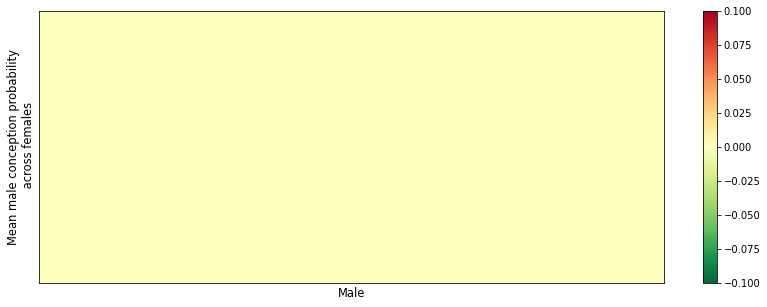

In [106]:
all_parents = [p[1] for p in model.groups[0].parents]
parent_counts = np.array([all_parents.count(m) for m in model.groups[0].males])
pymate.plt.rc('axes', labelsize=11.5) 
pymate.plt.figure(figsize = (14,5))
fig2 = pymate.plt.imshow(parent_counts[np.newaxis,:], cmap="RdYlGn_r", aspect="auto")
pymate.plt.colorbar(fig2)
pymate.plt.yticks([])
pymate.plt.xticks([])
pymate.plt.xlabel('Male')
pymate.plt.ylabel('Mean male conception probability\n across females')

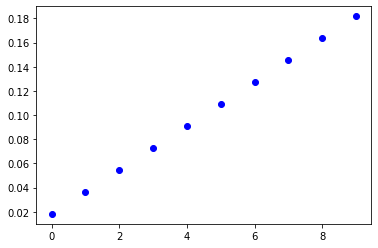

In [37]:
import numpy as np
l = [(i/10)**1 for i in range(1,11)]
plt.plot([i/sum(l) for i in l], 'bo')

In [42]:
!pip install pandastable


     |████████████████████████████████| 238 kB 3.6 MB/s eta 0:00:01
  Created wheel for pandastable: filename=pandastable-0.12.2.post1-py3-none-any.whl size=255031 sha256=a422943310431ff28e261d67c14eb73223bbfb1305c2259c679705619532dd09
  Stored in directory: /Users/kevinrosenfield/Library/Caches/pip/wheels/84/19/46/e87c22f8fb87c434d5cff47404e6133e70a07885df6f3ce2c1
Successfully built pandastable
You should consider upgrading via the '/Users/kevinrosenfield/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [74]:
seasonality = 0.0
l = np.array([random.randint(0,round(365 - (365 * seasonality))) for i in range(10)])
l

array([354, 148, 177, 199, 365, 234,  37, 139,  37,   8])

In [77]:
l - (min(l) + 1)

array([345, 139, 168, 190, 356, 225,  28, 130,  28,  -1])